Import necesary packages for project

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler 
import matplotlib.pyplot as plt
%pip install tensorflow
from tensorflow import keras
from tensorflow.keras import layers

  Using cached tensorflow-2.11.0-cp310-cp310-win_amd64.whl (1.9 kB)
Note: you may need to restart the kernel to use updated packages.


Import S&P500 historic data as CSV

In [4]:
ds = pd.read_csv("S&P 500 Historical Data.csv")
df = pd.DataFrame(ds)
print(df.head(5))
arr = np.array(df)
print("DataFrame:")
print(df)
print("Date:")
Date = np.flip(np.transpose(arr[:,np.where(np.array(df.columns) == 'Date')[0]])[0])
Date = pd.to_datetime(Date)
df["Price"] = df["Price"].str.replace(',','')
print(df["Price"])
df["Price"] = df["Price"].astype("float64")
print(Date)
print("Prices:")
prices = np.flip(np.transpose(arr[:,np.where(np.array(df.columns) == 'Price')[0]])[0])
prices = prices.astype(str)
prices = np.char.replace(prices,',','').astype(float)

print(prices)


         Date     Price      Open      High       Low Change %
0  10/30/2022  3,759.69  3,873.55  3,913.62  3,758.85   -3.62%
1  10/23/2022  3,901.06  3,770.75  3,906.05  3,741.38    3.95%
2  10/16/2022  3,752.75  3,652.35  3,764.55  3,646.34    4.74%
3  10/09/2022  3,583.07  3,651.20  3,711.73  3,490.00   -1.55%
4  10/02/2022  3,639.66  3,624.07  3,807.35  3,605.60    1.51%
DataFrame:
           Date     Price      Open      High       Low Change %
0    10/30/2022  3,759.69  3,873.55  3,913.62  3,758.85   -3.62%
1    10/23/2022  3,901.06  3,770.75  3,906.05  3,741.38    3.95%
2    10/16/2022  3,752.75  3,652.35  3,764.55  3,646.34    4.74%
3    10/09/2022  3,583.07  3,651.20  3,711.73  3,490.00   -1.55%
4    10/02/2022  3,639.66  3,624.07  3,807.35  3,605.60    1.51%
..          ...       ...       ...       ...       ...      ...
561  01/29/2012  1,344.90  1,316.16  1,345.34  1,300.49    2.17%
562  01/22/2012  1,316.33  1,315.29  1,333.47  1,306.06    0.07%
563  01/15/2012  1,315.38 

Partition data into Training and verification

In [5]:
cutoff = round(len(prices) * 0.8)
practice = prices[0:cutoff]
training = prices[cutoff+1:]
print(practice)

print(training[0].dtype)

[1277.81 1289.09 1315.38 1316.33 1344.9  1342.64 1361.23 1365.74 1369.63
 1370.87 1404.17 1397.11 1408.47 1398.08 1370.26 1378.53 1403.36 1369.1
 1353.39 1295.22 1317.82 1278.04 1325.66 1342.84 1335.02 1362.16 1354.68
 1356.78 1362.66 1385.97 1390.99 1405.87 1418.16 1411.13 1406.58 1437.92
 1465.77 1460.15 1440.67 1460.93 1428.59 1433.19 1411.94 1414.2  1379.85
 1359.88 1409.15 1416.18 1418.07 1413.58 1430.15 1402.43 1466.47 1472.05
 1485.98 1502.96 1513.17 1517.93 1519.79 1515.6  1518.2  1551.18 1560.7
 1556.89 1569.19 1553.28 1588.85 1555.25 1582.24 1614.42 1633.7  1667.47
 1649.6  1630.74 1643.38 1626.73 1592.43 1606.28 1631.89 1680.19 1692.09
 1691.65 1709.67 1691.42 1655.83 1663.5  1632.97 1655.17 1687.99 1709.91
 1691.75 1690.5  1703.2  1744.5  1759.77 1761.64 1770.61 1798.18 1804.76
 1805.81 1805.09 1775.32 1818.32 1841.4  1831.37 1842.37 1838.7  1790.29
 1782.59 1797.02 1838.63 1836.25 1859.45 1878.04 1841.13 1866.52 1857.62
 1865.09 1815.69 1864.85 1863.4  1881.14 1878.48 1877

Make prediction using LSTM model

Make sure to output to lstm variable as a numpy array of same size as prices

In [6]:
lstm = np.ones(len(prices))

Plotted data

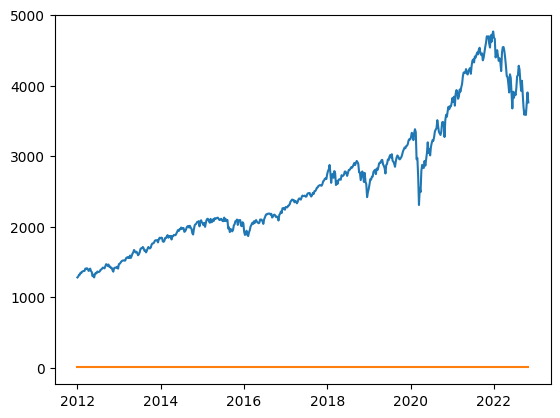

In [7]:
plt.plot(Date,prices,Date, lstm)

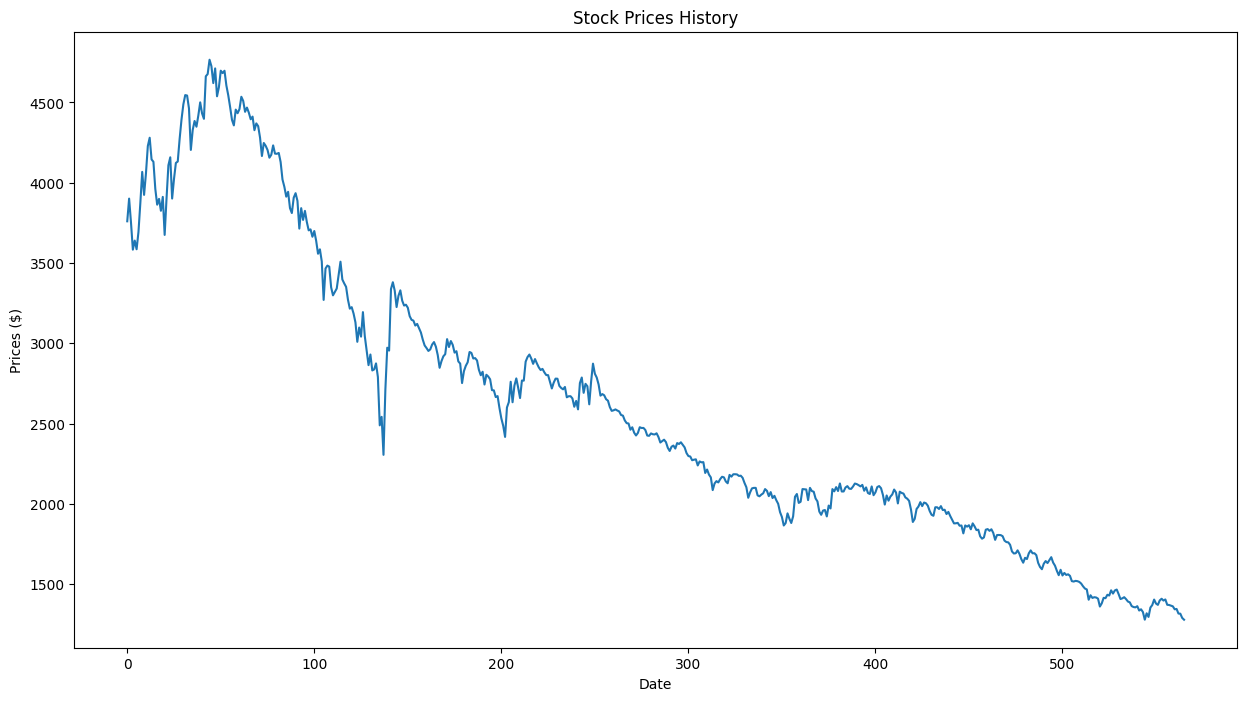

In [8]:
plt.figure(figsize=(15, 8))
plt.title('Stock Prices History')
plt.plot(df['Price'])
plt.xlabel('Date')
plt.ylabel('Prices ($)')
plt.show()

In [9]:
min_max_scale = MinMaxScaler(feature_range=(0,1))
scaled= min_max_scale.fit_transform(prices.reshape(-1,1))
training = scaled[0: cutoff, :]

x_train = []
y_train = []

for i in range(60, len(training)):
    x_train.append(training[i-60:i, 0])
    y_train.append(training[i, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [10]:
testing = scaled[cutoff-60: , : ]
x_test = []
y_test = prices[cutoff:]

for i in range(60, len(testing)):
    x_test.append(testing[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [11]:
lstm = keras.Sequential()
lstm.add(layers.LSTM(100, return_sequences=True, input_shape=(x_train.shape[1], 1)))
lstm.add(layers.LSTM(100, return_sequences=False))
lstm.add(layers.Dense(25))
lstm.add(layers.Dense(1))
lstm.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 100)           40800     
                                                                 
 lstm_1 (LSTM)               (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 25)                2525      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 123,751
Trainable params: 123,751
Non-trainable params: 0
_________________________________________________________________


In [12]:
lstm.compile(optimizer='adam', loss='mean_squared_error')
lstm.fit(x_train, y_train, batch_size= 1, epochs=3)

Epoch 1/3
393/393 [==============================] - 12s 17ms/step - loss: 0.0028
Epoch 2/3
393/393 [==============================] - 10s 26ms/step - loss: 0.0012
Epoch 3/3
393/393 [==============================] - 11s 28ms/step - loss: 9.4761e-04


In [13]:
predictions = lstm.predict(x_test)
predictions = min_max_scale.inverse_transform(predictions)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

4/4 [==============================] - 3s 19ms/step


134.88012124930864

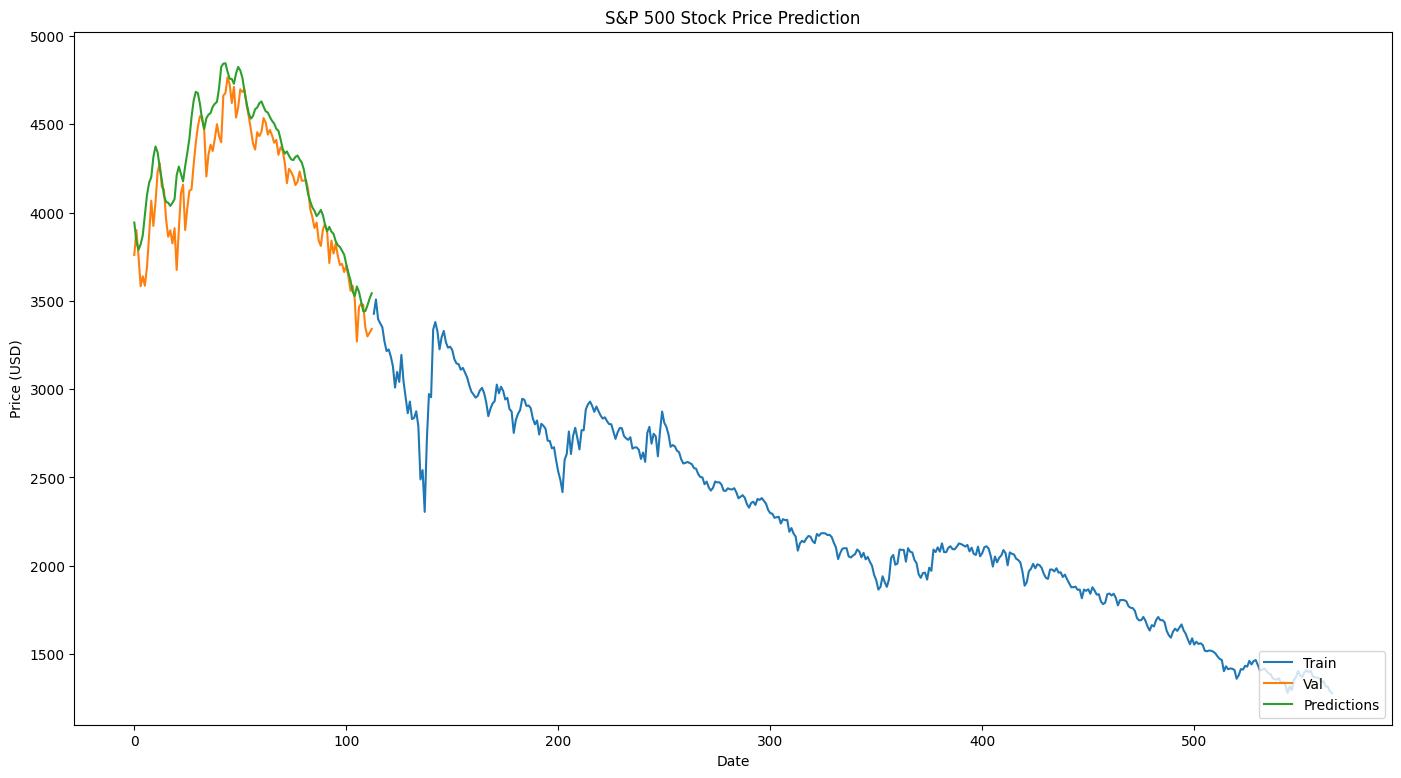

In [14]:
data = df.loc[::-1].filter(['Price'])
train = data[:cutoff]
validation = data[cutoff:].copy(deep=True)
validation['Predictions'] = predictions
plt.figure(figsize=(17,9))
plt.title('S&P 500 Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.plot(train)

plt.plot(validation[['Price','Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()